<a href="https://colab.research.google.com/github/howard1028/Deep_Visualization/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbor
K-nearest neighbor(KNN) is an algorithm that often used in classification task. It predicts a class for test data by calculating the distances between the test data and all the training data. We are going to implement a KNN classifier with MNIST dataset in this exercise.

MNIST dataset contains 70,000 sets of images and labels for handwritten digits. Each image is 28*28 pixel in grayscale and labeled between 0 to 9.

## Data Preparation and Visualization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/深度視覺/HW2')

In [ ]:
from _utils import load_data
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#load data包含train_data, train_label, test_data, test_label, classes
train_data, train_label, test_data, test_label, classes = load_data() 

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



In [ ]:
#data是三維的NumPy陣列，形狀是(num_train_data,test_data_height,test_data_width)，num_train_data是訓練資料的筆數，test_data_height和test_data_width是每一筆測試資料的高度和寬度

print(f'Shape of training data: {train_data.shape}') #shape:用tuple表示二維陣列的size
print(f'Shape of training labels: {train_label.shape}')
print(f'Shape of test data: {test_data.shape}')
print(f'Shape of test labels: {test_label.shape}')
print(f'Number of classes: {len(classes)}')

Shape of training data: (60000, 28, 28)
Shape of training labels: (60000,)
Shape of test data: (10000, 28, 28)
Shape of test labels: (10000,)
Number of classes: 10


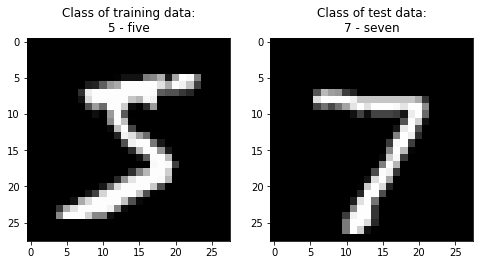

In [ ]:
# Display samples of training data and test data with their classes
plt.rcParams['figure.figsize'] = (8, 5) #設置圖形大小為(8,5)
plt.rcParams['image.cmap'] = 'gray' #設置圖形顯示為灰度圖像
fig, (ax1, ax2) = plt.subplots(1, 2) #創建一個包含兩個子圖的圖，fig是整個圖，(ax1, ax2)是子圖，1行2列
ax1.imshow(train_data[0]); ax1.set_title(f'Class of training data:\n{classes[train_label[0]]}')
ax2.imshow(test_data[0]); ax2.set_title(f'Class of test data:\n{classes[test_label[0]]}')
fig.show()

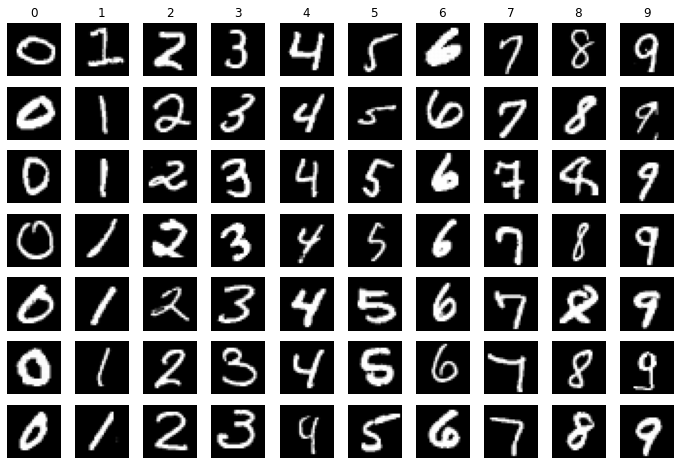

In [ ]:
# Display samples of training data from every classes
plt.rcParams['figure.figsize'] = (12, 8)
num_classes = len(classes)
num_example = 7 #設置每個class要顯示的樣本數量
for label, _ in enumerate(classes):
  idxs = np.flatnonzero(train_label == label) #idxs:train data中目前class的index
  idxs = np.random.choice(idxs, num_example, replace=False) #從該index選取指定數量的樣本且不重複
  for i, idx in enumerate(idxs):
    plt_idx = i * num_classes + label + 1 #i*num_classes為列的偏移量，label+1為行的偏移量
    plt.subplot(num_example, num_classes, plt_idx) #子圖的行數，列數，index
    plt.imshow(train_data[idx]); plt.axis('off')
    if i == 0:
      plt.title(label)
plt.show()

## KNN Implementation

In [ ]:
#knn：決定k值，求每個鄰居跟自己之間的距離，找出跟自己最近的k個鄰居，查看哪一組鄰居數量最多，就加入哪一組

class knn(object):
  def __init__(self, data, label):
    self.num_train_data = data.shape[0]
    self.train_data = data.reshape(self.num_train_data, -1) #data的形狀轉換為(num_train_data,flatten_train_data)
    self.train_label = label
  def predict(self, test_data, dist_metric='l1', k=1): #k：鄰居的數量
    num_test_data = test_data.shape[0]
    dists = np.zeros((num_test_data, self.num_train_data)) #儲存train data和test data距離的二維陣列
    if dist_metric == 'l1': #L1 distance：差的絕對值總和

      # -----START OF YOUR CODE-----
      flatten_test_data = test_data.reshape(num_test_data,-1)
      for i in range(num_test_data):
        dists[i] = np.sum(np.abs(self.train_data - flatten_test_data[i]), axis=1)
      # print("dists L1=",dists)
      # ------END OF YOUR CODE------
    elif dist_metric == 'l2': #L2 distance：差的平方總和開根號

      # -----START OF YOUR CODE-----
      flatten_test_data = test_data.reshape(num_test_data,-1)
      for i in range(num_test_data):
        dists[i] = np.sqrt(np.sum(np.square(self.train_data - flatten_test_data[i]), axis=1))
      # print("dists L2=",dists)
      # ------END OF YOUR CODE------
    else:
      raise ValueError("dist_metric can only be 'l1' or 'l2'")

    preds = np.zeros(num_test_data)

    # -----START OF YOUR CODE-----
    for i in range(num_test_data):
      closest_index = np.argsort(dists[i])[:k] #找到最近的k個距離train data對應的index
      closest_labels = self.train_label[closest_index] #從這k個最近的train data取出label
      counts = np.bincount(closest_labels) #計算每個label出現的次數
      preds[i] = np.argmax(counts) #把出現次數最多的label作為該測試的預測label
    # ------END OF YOUR CODE------
    return preds

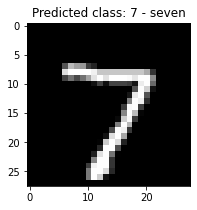

In [ ]:
# Run a single test
single_test_data = test_data[:1]
num_test_data, test_data_height, test_data_width = single_test_data.shape
classifier = knn(train_data, train_label)
predicted_label = classifier.predict(single_test_data, k=1, dist_metric='l2')[0].astype(np.int32)
plt.rcParams['figure.figsize'] = (3, 3)
plt.imshow(single_test_data.reshape(test_data_height, test_data_width)); plt.title(f'Predicted class: {classes[predicted_label]}')
plt.show()

## Applied in Small Dataset 

In [ ]:
small_train_data = train_data[:5000]
small_train_label = train_label[:5000]
small_test_data = test_data[:500]
small_test_label = test_label[:500]
classifier = knn(small_train_data, small_train_label)
print(f'Number of training data: {small_train_data.shape[0]}')
print(f'Number of test data: {small_test_data.shape[0]}')

Number of training data: 5000
Number of test data: 500


In [ ]:
num_test_data = small_test_data.shape[0]
for dm in ['l1', 'l2']:
  print(f'Using {dm.upper()} distance metric:')
  for kv in [2, 3, 4, 10, 20]:
    preds = classifier.predict(small_test_data, k=kv, dist_metric=dm)
    num_correct = np.sum(preds == small_test_label)
    accuracy = float(num_correct) / num_test_data
    print(f'k = {kv}, accuracy = {accuracy}')
  print('')

Using L1 distance metric:
k = 2, accuracy = 0.23
k = 3, accuracy = 0.246
k = 4, accuracy = 0.222
k = 10, accuracy = 0.226
k = 20, accuracy = 0.212

Using L2 distance metric:
k = 2, accuracy = 0.204
k = 3, accuracy = 0.204
k = 4, accuracy = 0.212
k = 10, accuracy = 0.196
k = 20, accuracy = 0.172



## Applied in Whole Dataset
Try your best to find ideal choices of k value `kv` and distance metric `dm` to maximize the accuracy!

In [ ]:
# -----You may change values here-----
# kv = 2
# dm = 'l1'
# ---------------------------------------

num_test_data = test_data.shape[0]
# preds = classifier.predict(test_data, k=kv, dist_metric=dm)
# num_correct = np.sum(preds == test_label)
# accuracy = float(num_correct) / num_test_data
# print(f'Using {dm.upper()} distance metric, k = {kv}\nAccuracy = {accuracy}')


for dm in ['l1', 'l2']:
  print(f'Using {dm.upper()} distance metric:')
  for kv in [2, 3, 4, 10, 20]:
    preds = classifier.predict(test_data, k=kv, dist_metric=dm)
    num_correct = np.sum(preds == test_label)
    accuracy = float(num_correct) / num_test_data
    print(f'k = {kv}, accuracy = {accuracy}')
  print('')

Using L1 distance metric:
k = 2, accuracy = 0.2179
k = 3, accuracy = 0.2335
k = 4, accuracy = 0.2019
k = 10, accuracy = 0.1838
k = 20, accuracy = 0.1702

Using L2 distance metric:
k = 2, accuracy = 0.1989
k = 3, accuracy = 0.2057
k = 4, accuracy = 0.2036
k = 10, accuracy = 0.1821
k = 20, accuracy = 0.1624

